In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import dataset
import pandas as pd

# Attempt to read the CSV file with a different encoding
dataset = pd.read_csv("/content/drive/MyDrive/SMSSpamCollection/spam.csv", sep = ",", encoding='latin1')


In [ ]:
dataset

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dataset.isnull().sum()

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
dataset.describe()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
dataset['label'] = dataset['label'].map({'ham' : 0 , 'spam' : 1})

In [ ]:
dataset

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

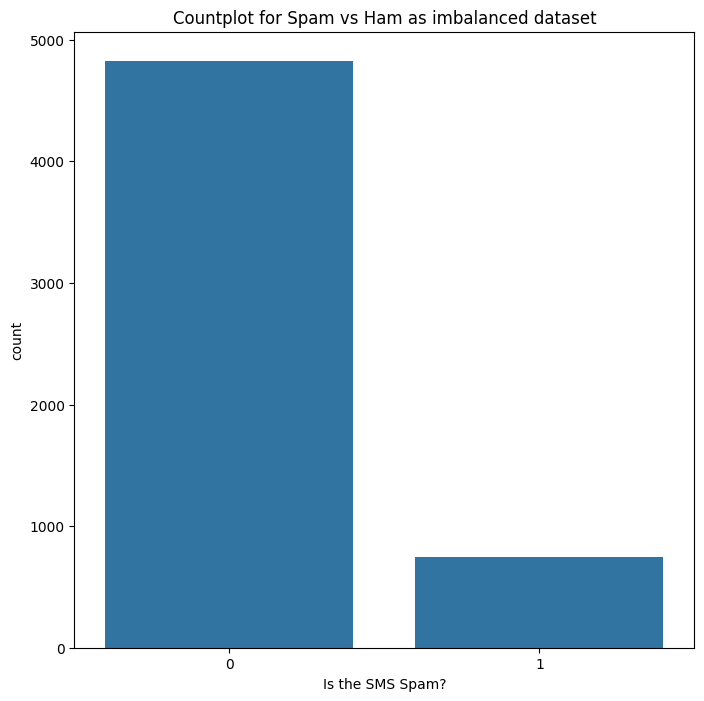

In [ ]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="label", data=dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('count')


In [ ]:
only_spam = dataset[dataset["label"] ==1]
only_spam

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN


In [ ]:
dataset.shape

(5572, 5)

In [ ]:
count = int((dataset.shape[0]  - only_spam.shape[0]) / only_spam.shape[0])

In [ ]:
count

6

In [ ]:
for i in range(0, count-1):
   dataset = pd.concat([dataset, only_spam])

In [ ]:
dataset

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN


In [ ]:
dataset.reset_index()

,index,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN


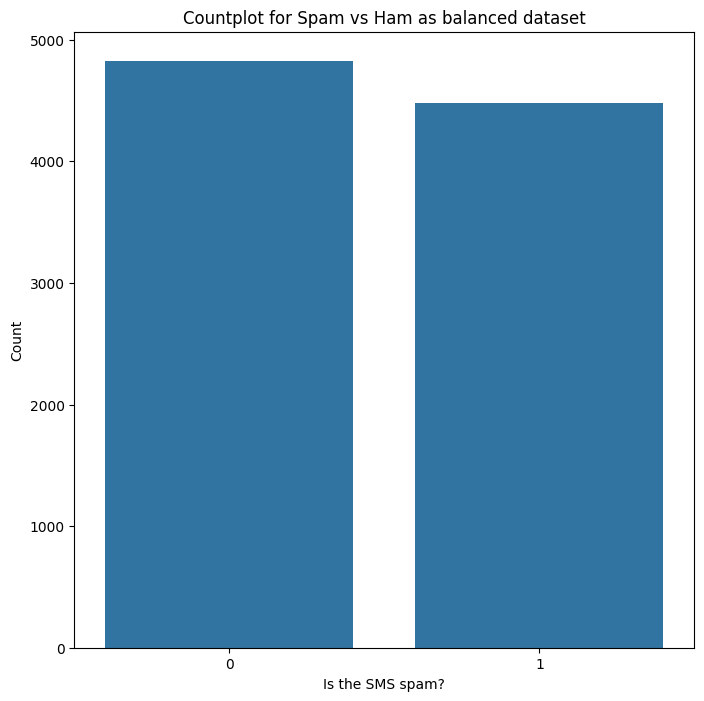

In [ ]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="label" , data=dataset)
p = plt.title('Countplot for Spam vs Ham as balanced dataset')
p = plt.xlabel('Is the SMS spam?')
p = plt.ylabel('Count')

In [ ]:
dataset['word_count'] = dataset['message'].apply(lambda x : len(x.split()))

In [ ]:
dataset

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,28


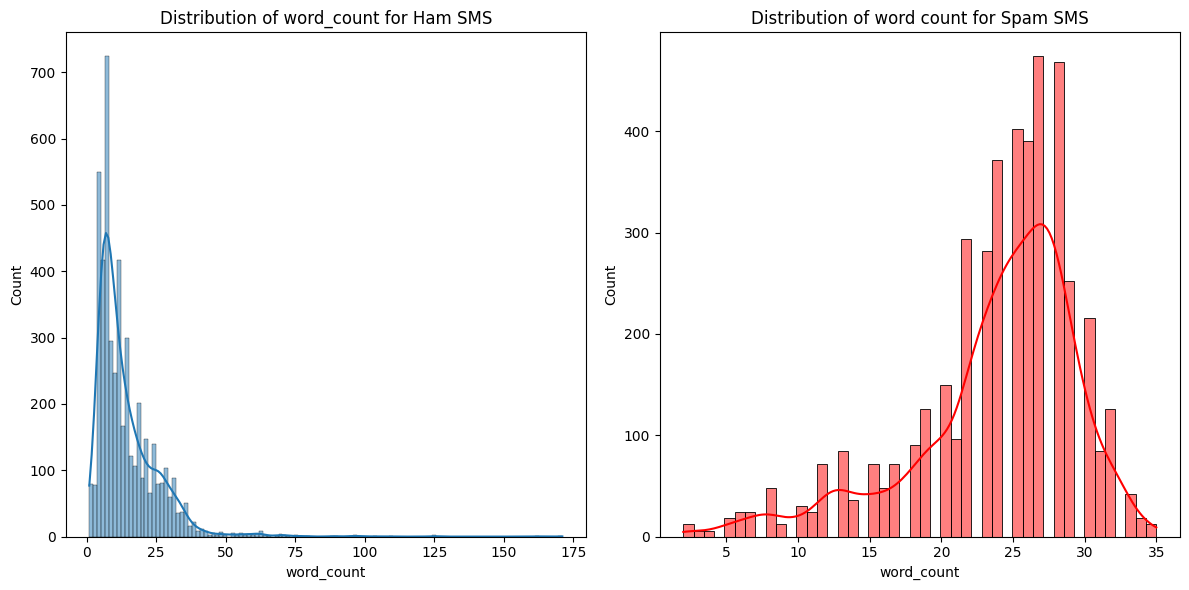

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset['label'] == 0].word_count, kde = True)
p = plt.title('Distribution of word_count for Ham SMS')

plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset['label'] == 1].word_count, color = "red", kde = True)
p = plt.title('Distribution of word count for Spam SMS')

plt.tight_layout()
plt.show()

In [ ]:
def currency(data):
    currency_symbols = ['€', '$', '¥', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0


In [ ]:
dataset["contains_currency_symbol"] = dataset["message"].apply(currency)

In [ ]:
dataset

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20,0
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28,0
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13,0
...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,33,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,28,0


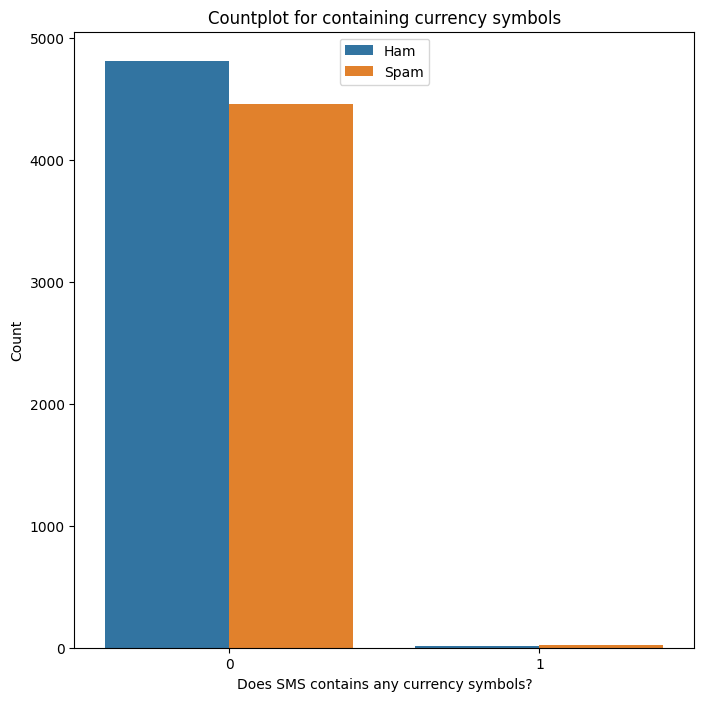

In [ ]:
plt.figure(figsize=(8, 8))
p = sns.countplot(x="contains_currency_symbol", data=dataset, hue="label")
p = plt.title('Countplot for containing currency symbols')
p = plt.xlabel('Does SMS contains any currency symbols?')
p = plt.ylabel('Count')
p = plt.legend(labels=["Ham", "Spam"], loc= 9)
plt.show()


In [ ]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
           return 1
    return 0

In [ ]:
dataset["contains_numbers"] = dataset["message"].apply(number)

In [ ]:
dataset

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4,word_count,contains_currency_symbol,contains_numbers
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20,0,0
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28,0,1
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13,0,0
...,...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,33,0,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,28,0,1


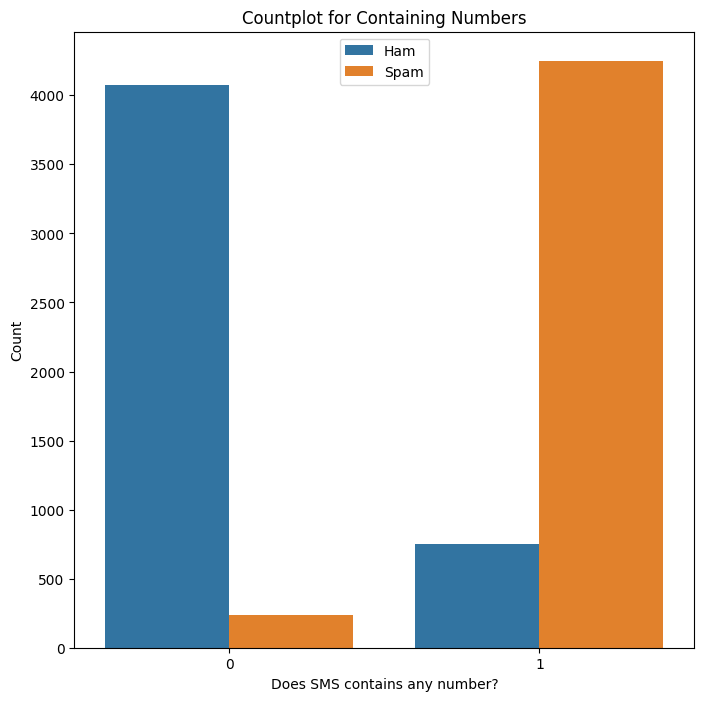

In [ ]:
plt.figure(figsize=(8, 8))
p = sns.countplot(x="contains_numbers" , data=dataset, hue="label")
p = plt.title('Countplot for Containing Numbers')
p = plt.xlabel('Does SMS contains any number?')
p = plt.ylabel('Count')
p = plt.legend(labels=["Ham", "Spam"], loc= 9)
plt.show()

In [ ]:
#Data Cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
    message = re.sub(pattern='[^a-zA-Z]' , repl= ' ', string=sms) #Filtering outspecial characters and numbers
    message = message.lower()
    words = message.split() #Tokenizer
    Filtered_words = [word for word in words if word not in set (stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in Filtered_words]
    message = ' '.join(lemm_words)

    corpus.append(message)

In [ ]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [ ]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf = TfidfVectorizer(max_features = 500)
vectors = Tfidf.fit_transform(corpus).toarray()
feature_names = Tfidf.get_feature_names_out()

In [ ]:
X = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [ ]:
X

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.409254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.325761,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [ ]:
#Naive Bayes Model

#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split # Import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

mnb.fit(X_train, y_train) # Now X_train and y_train are defined
y_pred = mnb.predict(X_test)



0.944
0.004


In [ ]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

1155    0
1790    0
3003    1
1121    1
592     1
       ..
4147    1
274     0
1345    0
2366    1
4031    0
Name: label, Length: 1862, dtype: int64

In [ ]:
from sklearn.metrics import classification_report # Import the missing function

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [ ]:
from sklearn.metrics import confusion_matrix # Import the missing function

cm = confusion_matrix(y_test, y_pred)
cm

array([[908,  50],
       [ 57, 847]])

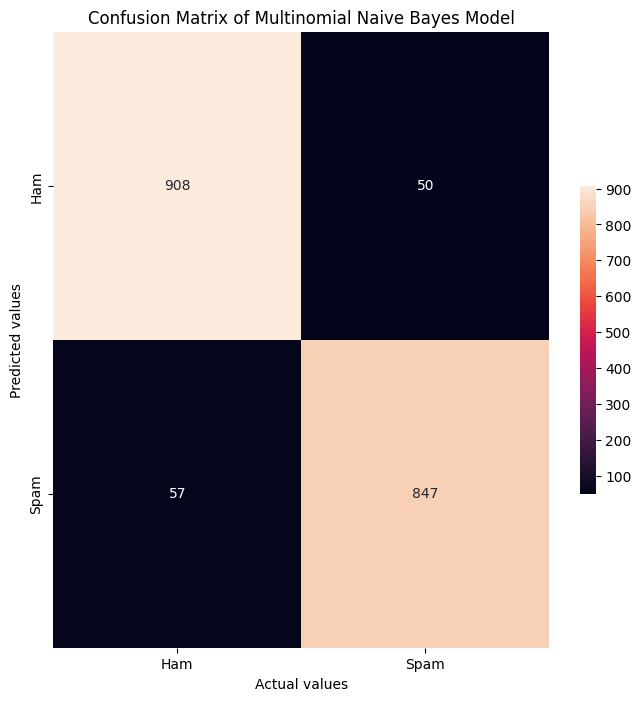

In [ ]:
plt.figure(figsize=(8, 8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.title('Confusion Matrix of Multinomial Naive Bayes Model')
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.ylabel('Predicted values')
plt.show()

In [ ]:
def predict_spam(sms):
  message = re.sub(pattern='[^a-zA-Z]' , repl= ' ', string=sms) #Filtering outspecial characters and numbers
  message = message.lower()
  message = message.split() #Tokenizer
  Filtered_words = [word for word in words if word not in set (stopwords.words('english'))]
  lemm_words = [wnl.lemmatize(word) for word in Filtered_words]
  message = ' '.join(lemm_words)
  message = tfidf.transform([message]).toarray()
  return dt.predict(temp)